In [55]:
from main_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


warnings.filterwarnings("ignore")

In [53]:
Zonename = ["Bruce","East","Essa","Niagara","Northeast","NorthWest","Ottawa","Toronto","West"]

In [ ]:
mae_present = pd.DataFrame()
for zone in Zonename:
    df = pd.read_csv("data/"+zone+"_using.csv")
    
    df["datetime"] = pd.to_datetime(df["Date/Time (LST)"])
    df["hour"] = df["datetime"].dt.hour

    df.rename(columns={
        "Temp (°C)": "temp",
        "Stn Press (kPa)": "pressure",
        "Rel Hum (%)": "hum",
        "Wind Spd (km/h)": "windspeed"
    }, inplace=True)

    lags_morning = [1, 24, 48, 72, 168, 336, 504]
    lags_day = [1, 48, 72, 96, 168, 336, 504]
    exog_features = ['temp', 'pressure', 'hum', 'windspeed']

    pred_period = 14
    split_index = len(df) - max(lags_morning)- 24 * pred_period
    
    y_test_ar,y_pred_ar,theta = train_kalman_ar(df, zone,lags_morning, lags_day, exog_features)
    mae_ar = mean_absolute_percentage_error(y_test_ar, y_pred_ar)

    y_test_vk,y_pred_vk,theta = train_viking_ar(df, zone,lags_morning, lags_day, exog_features)
    mae_vk = mean_absolute_percentage_error(y_test_vk, y_pred_vk)

    y_test_lstm, y_pred_lstm, model_lstm, history_lstm= train_lstm_manual(df, zone,lags_morning, lags_day, exog_features)
    mae_lstm = mean_absolute_percentage_error(y_test_lstm, y_pred_lstm)

    y_test_mlp, y_pred_mlp, model_mlp, history_mlp= train_mlp_manual(df, zone,lags_morning, lags_day, exog_features)
    mae_mlp = mean_absolute_percentage_error(y_test_mlp, y_pred_mlp)

    y_test_transformer, y_pred_transformer, model_transformer = train_transformer(df, zone,lags_morning, lags_day, exog_features)
    mae_transformer = mean_absolute_percentage_error(y_test_transformer, y_pred_transformer)

    mae_dic = {
        "KalmanAR":mae_ar,
        "VIKINGAR":mae_vk,
        "LSTM":mae_lstm,
        "MLP":mae_mlp,
        "Transformer":mae_transformer
    }

    mae_df = pd.DataFrame.from_dict(mae_dic, orient='index', columns=['MAPE '+zone])
    mae_present = pd.concat([mae_present,mae_df], axis=1)

Epoch 1/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 0.0188 - val_loss: 0.0017
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0028 - val_loss: 6.8015e-04
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.0011 - val_loss: 6.7329e-04
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0010 - val_loss: 7.6780e-04
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 9.9494e-04 - val_loss: 5.9097e-04
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 9.8372e-04 - val_loss: 6.0046e-04
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 9.6521e-04 - val_loss: 5.9763e-04
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 9.1369e-04 - val_loss: 6.0375e-04
Epoch 9/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 8.1094e-04 - val_loss: 5.9684e-04
Epoch 10/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 9.2778e-04 - val_loss: 5.8891e-04
Epoch 11/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 502u

KeyboardInterrupt: 

In [ ]:
zone = "Bruce"

df = pd.read_csv("data/"+zone+"_using.csv")

# Convert datetime and extract hour
df["datetime"] = pd.to_datetime(df["Date/Time (LST)"])
df["hour"] = df["datetime"].dt.hour

# Rename for easier access
df.rename(columns={
    "Temp (°C)": "temp",
    "Stn Press (kPa)": "pressure",
    "Rel Hum (%)": "hum",
    "Wind Spd (km/h)": "windspeed"
}, inplace=True)

## Configuration

In [40]:
lags_morning = [1, 24, 48, 72, 168, 336, 504]
lags_day = [1, 48, 72, 96, 168, 336, 504]
exog_features = ['temp', 'pressure', 'hum', 'windspeed']

pred_period = 14
split_index = len(df) - max(lags_morning)- 24 * pred_period

## KalmanAR

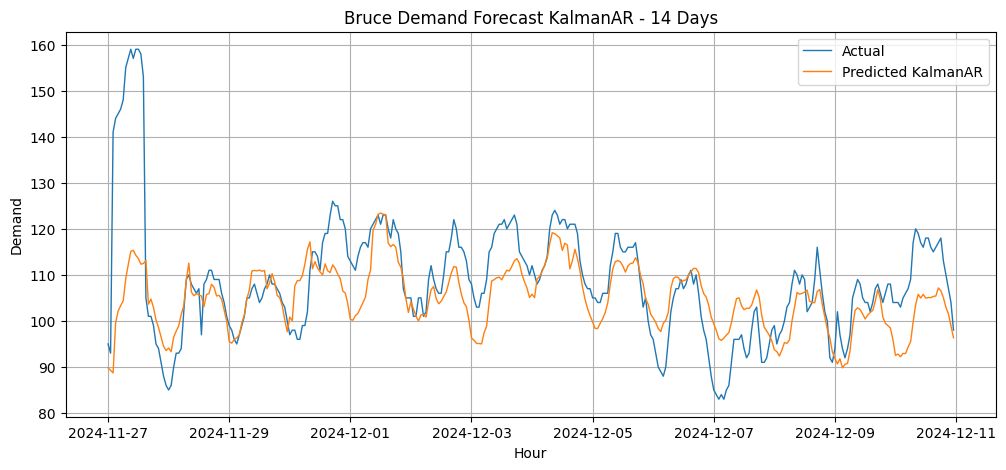

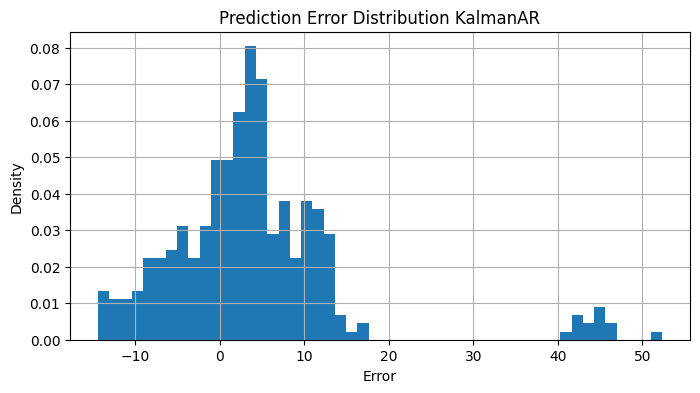

MAE: 7.325037998654499


In [41]:
y_test_ar,y_pred_ar,theta = train_kalman_ar(df, zone,lags_morning, lags_day, exog_features)
plot2(df,y_test_ar,y_pred_ar,split_index,pred_period,zone,modelname="KalmanAR")
mae_ar = mean_absolute_error(y_test_ar, y_pred_ar)

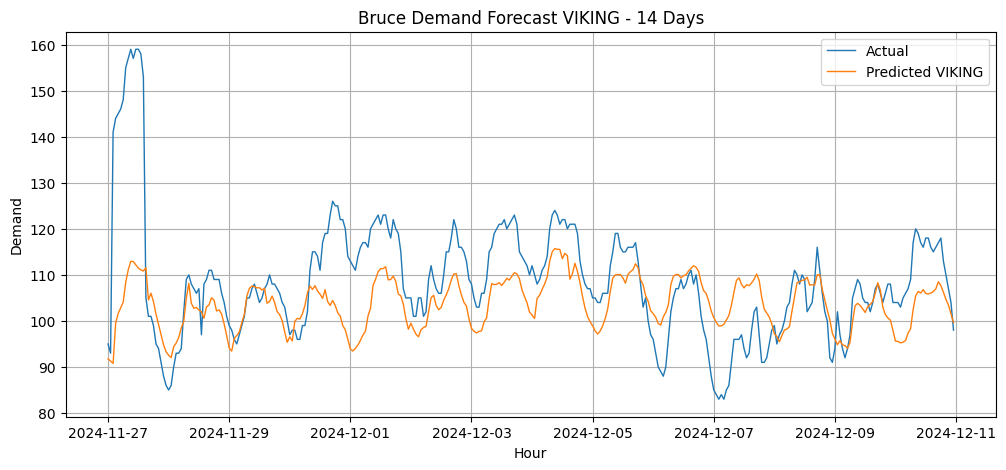

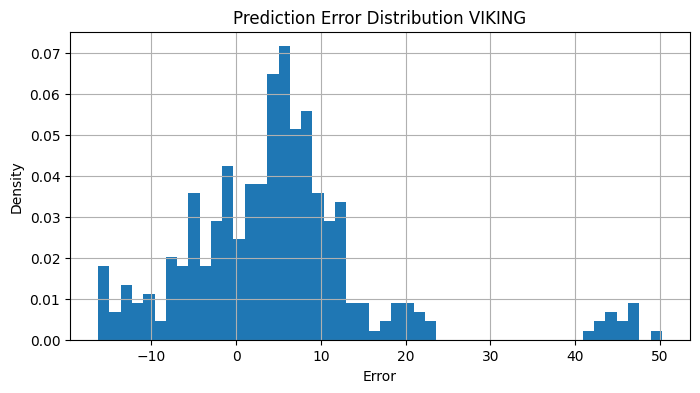

MAE: 8.626579606624809


In [42]:
y_test_vk,y_pred_vk,theta = train_viking_ar(df, zone,lags_morning, lags_day, exog_features)
plot2(df,y_test_vk,y_pred_vk,split_index,pred_period,zone,modelname="VIKING")
mae_vk = mean_absolute_error(y_test_vk, y_pred_vk)

## LSTM

Epoch 1/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 0.0150 - val_loss: 0.0019
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0029 - val_loss: 6.6326e-04
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0012 - val_loss: 6.2008e-04
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.0012 - val_loss: 5.9012e-04
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 9.4953e-04 - val_loss: 5.7905e-04
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 8.8866e-04 - val_loss: 6.1179e-04
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 9.5460e-04 - val_loss: 5.9305e-04
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 8.9639e-04 - val_loss: 6.1892e-04
Epoch 9/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 8.4799e-04 - val_loss: 5.9764e-04
Epoch 10/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 8.3462e-04 - val_loss: 6.5594e-04
Epoch 11/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 523u

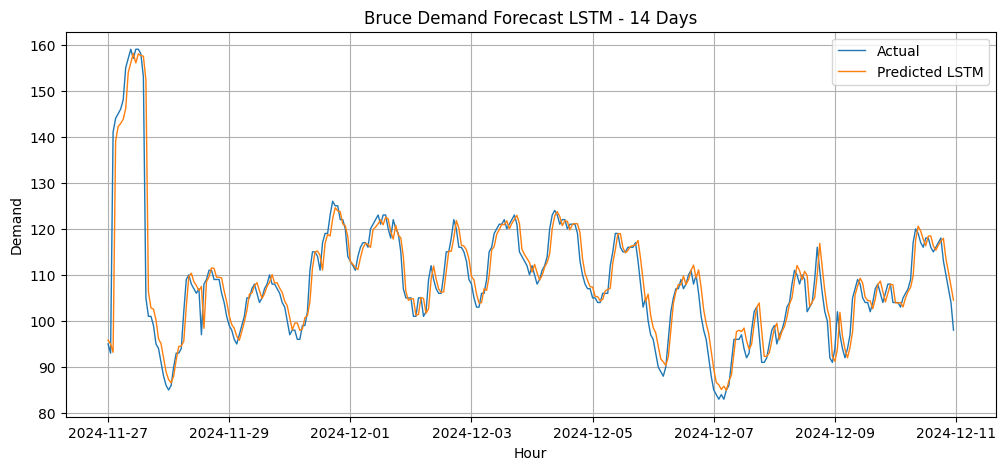

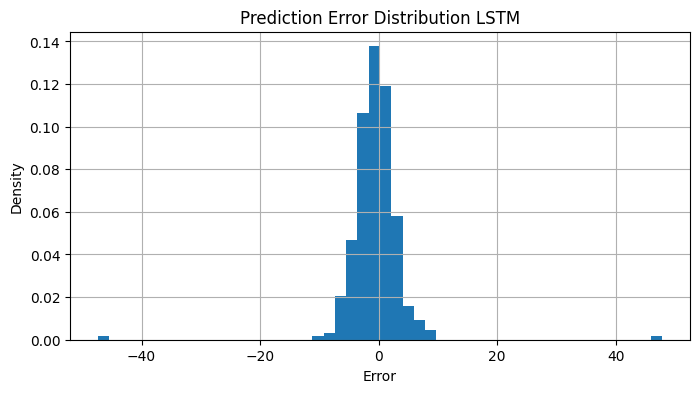

MAE: 2.5787562415713357


In [43]:
y_test_lstm, y_pred_lstm, model_lstm, history_lstm= train_lstm_manual(df, zone,lags_morning, lags_day, exog_features)
plot2(df,y_test_lstm,y_pred_lstm,split_index,pred_period,zone,modelname="LSTM")
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)

## MLP

Epoch 1/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.0084 - val_loss: 0.0011
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0016 - val_loss: 7.9009e-04
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.0015 - val_loss: 0.0010
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0012 - val_loss: 6.3493e-04
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0011 - val_loss: 7.2279e-04
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.0013 - val_loss: 6.8883e-04
Epoch 9/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0012 - val_loss: 6.5601e-04
Epoch 10/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0011 - val_loss: 9.2255e-04
Epoch 11/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 9.6122e-04 - val_loss

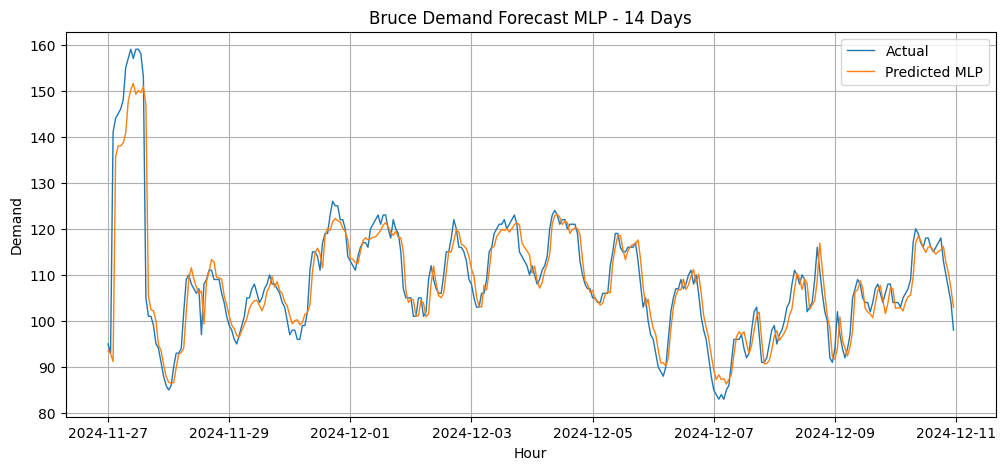

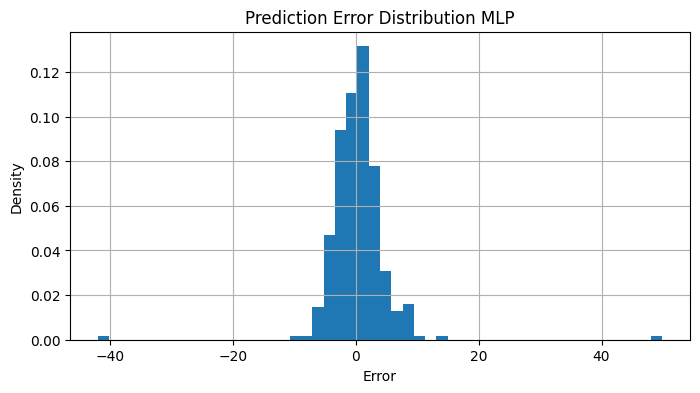

MAE: 2.8753420966012135


In [44]:
y_test_mlp, y_pred_mlp, model_mlp, history_mlp= train_mlp_manual(df, zone,lags_morning, lags_day, exog_features)
plot2(df,y_test_mlp,y_pred_mlp,split_index,pred_period,zone,modelname="MLP")
mae_mlp = mean_absolute_error(y_test_mlp, y_pred_mlp)

## Transformer

Epoch 1, Train Loss: 0.3219
Epoch 11, Train Loss: 0.0615
Epoch 21, Train Loss: 0.0630
Epoch 31, Train Loss: 0.0545
Epoch 41, Train Loss: 0.0542
Epoch 51, Train Loss: 0.0501
Epoch 61, Train Loss: 0.0447
Epoch 71, Train Loss: 0.0428
Epoch 81, Train Loss: 0.0399
Epoch 91, Train Loss: 0.0399


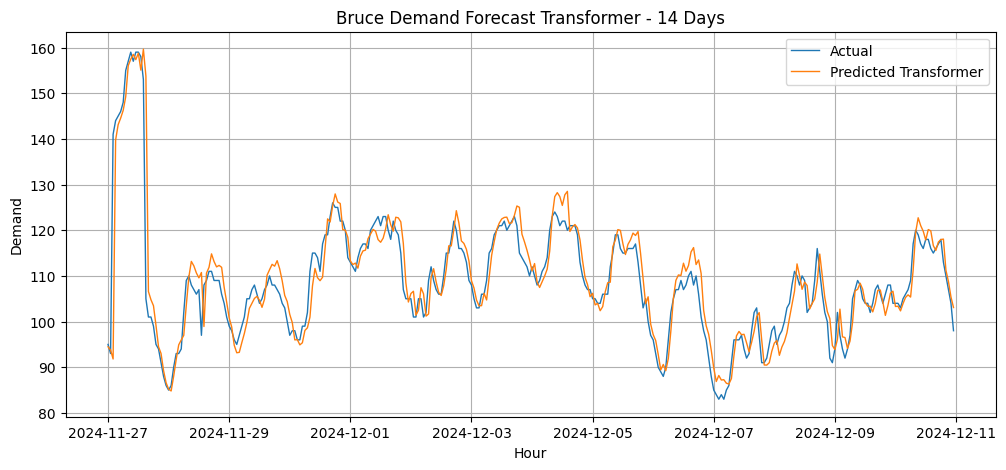

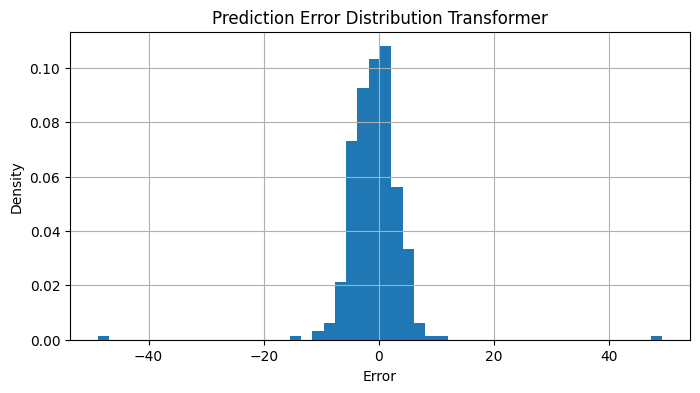

MAE: 3.115196943283081


In [45]:
y_test_transformer, y_pred_transformer, model_transformer = train_transformer(df, zone,lags_morning, lags_day, exog_features)
plot2(df,y_test_transformer,y_pred_transformer,split_index,pred_period,zone,modelname="Transformer")
mae_transformer = mean_absolute_error(y_test_transformer, y_pred_transformer)

In [46]:
def make_mae(zone):
    mae_dic={
    "KalmanAR":mae_ar,
    "VIKINGAR":mae_vk,
    "LSTM":mae_lstm,
    "MLP":mae_mlp,
    "Transformer":mae_transformer
}

    mae_df = pd.DataFrame.from_dict(mae_dic, orient='index', columns=['MAE'+zone])

In [47]:
mae_dic={
    "KalmanAR":mae_ar,
    "VIKINGAR":mae_vk,
    "LSTM":mae_lstm,
    "MLP":mae_mlp,
    "Transformer":mae_transformer
}

mae_df = pd.DataFrame.from_dict(mae_dic, orient='index', columns=['MAE'])

mae_dic={
    "KalmanAR":mae_ar+1,
    "VIKINGAR":mae_vk+1,
    "LSTM":mae_lstm+1,
    "MLP":mae_mlp+1,
    "Transformer":mae_transformer
}

mae2_df = pd.DataFrame.from_dict(mae_dic, orient='index', columns=['MAE2'])

mae_test = pd.concat([mae_df, mae2_df], axis=1)

print(mae_test)

                  MAE      MAE2
KalmanAR     7.325038  8.325038
VIKINGAR     8.626580  9.626580
LSTM         2.578756  3.578756
MLP          2.875342  3.875342
Transformer  3.115197  3.115197
